### Ship it?

Ok, so we just learned about error due to variance.  We saw that error due to variance comes from our model training on data that has randomness in it, and that because of this, we would expect our model to differ if we were to train it on different subsets of our data.

Now one thing to know about error due to variance, is that it results in overfitting.  Overfitting occurs whenever the accuracy of our model is stronger on our training set than on a dataset we see in production.  Let's see why error due to variance can cause overfitting.

Ok, so let's go back to the first set of parameters we modeled.  

In [139]:
initial_model.coef_

array([2.92758716])

In [140]:
initial_model.intercept_

23.442830299121226

In [142]:
initial_model.score(temperatures.reshape(-1, 1), noisy_customers)

0.8631884281161578

So here are the new temperatures and new customer amounts that we see enter the restaurant in the following months.

In [170]:
seed(10)

dataset = build_data_set()
new_temps = dataset[:, 0]
new_noisy_customers = dataset[:, 1]

And because we do not retrain our model -- we already did that -- we use the same model to predict the future amounts of customers.

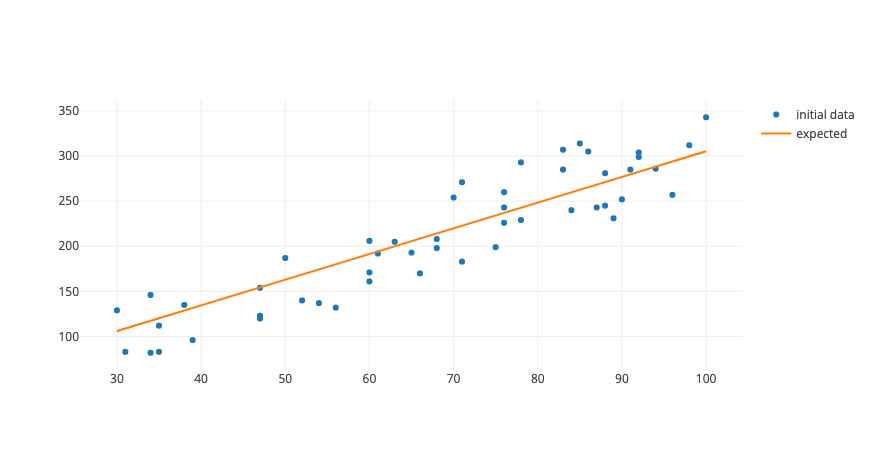

In [171]:
data_trace = trace_values(new_temps, new_noisy_customers, name = 'initial data')

plot([data_trace, model_trace])

Ok, it doesn't look bad. Let's see how we did.

In [172]:
model.score(new_temps.reshape(-1, 1), new_noisy_customers)

0.8324692980187842

So our model performed worse on our future data.  And while this is not always the case, when we follow the approach above, this often occurs.  Why does our model perform worse when we put our data into production than when we trained our model?

### This is overfitting

The reason why our model performs worse on the production data than on our training data is because our model adjusted to the randomness on the training set.  So it drew a line that was influenced by the random fluctuations.  Because these random fluctuations are unlikely to occur in the future, these adjustments hurt the model's ability to predict future outcomes.  

This incorrect model overperforms on the training data because it matches the randomness, but it tends to underperform on the production data because matching the randomness of the training data incorrectly influenced the model.  And this phenomenon is reflected in the difference in how the model scores on the training data versus the production data.  This problem is commonly referred to as the *generalization* problem in machine learning, because our model has a problem generalizing to data that it did not train on.

### Summary

In this lesson, we learned about error due to variance.  Error due to variance occurs because we train on data that has randomness built into it.  Because of this if we imagined (or actually did) train our model on different multiple times, the parameters of our model would vary each time.  This fluctuation is called variance.  Now because this variance is random, if we were to take the average of the parameters we would expect the error due to variance to cancel each other out, and thus equal zero.  We saw a demonstration of this, when we averaged our models, and the parameters approached the true model parameters.

We saw that one danger of error due to variance is overfitting.  We have overfitting when our model performs better on data it trained on than on data it did not yet see.  This problem is referred to as a problem of generalization.

